<a href="https://colab.research.google.com/github/Hana-Nadir/repository-1/blob/main/stage3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## stage 3 hackbio


In [2]:
! pip install chembl-webresource-cleint
! pip install rdkit-pypi
! pip install mordred

ERROR: Could not find a version that satisfies the requirement chembl-webresource-cleint (from versions: none)
ERROR: No matching distribution found for chembl-webresource-cleint
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.9 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176717 sha256=2f5e83b26b22098886c5bfafc913f09e5eca971b86a3762ef431506051d181d6
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3


In [3]:
! pip install chembl-webresource-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.3 MB/s eta 0:00:00


In [4]:
# import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import rdkit
from rdkit.Chem import Descriptors, Lipinski
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from mordred import Calculator, descriptors

In [5]:
## uploading my target
my_target = new_client.target
target_query = my_target.search('methionine')


In [6]:
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'A6H5Y3', 'xref_name': None, 'xre...",Mus musculus,Methionine synthase,15.0,False,CHEMBL3188,"[{'accession': 'A6H5Y3', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Bos taurus,Mitochondrial peptide methionine sulfoxide red...,15.0,False,CHEMBL2007622,"[{'accession': 'P54149', 'component_descriptio...",SINGLE PROTEIN,9913
2,[],Homo sapiens,Methionine synthase,15.0,False,CHEMBL2150844,"[{'accession': 'Q99707', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Rattus norvegicus,Mitochondrial peptide methionine sulfoxide red...,15.0,False,CHEMBL3509605,"[{'accession': 'Q923M1', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Trypanosoma brucei brucei (strain 927/4 GUTat1...,"Methionyl-tRNA synthetase, putative",14.0,False,CHEMBL2146303,"[{'accession': 'Q38C91', 'component_descriptio...",SINGLE PROTEIN,999953
5,"[{'xref_id': 'P0AE18', 'xref_name': None, 'xre...",Escherichia coli K-12,Methionine aminopeptidase,13.0,False,CHEMBL3423,"[{'accession': 'P0AE18', 'component_descriptio...",SINGLE PROTEIN,83333
6,"[{'xref_id': 'P13444', 'xref_name': None, 'xre...",Rattus norvegicus,S-adenosylmethionine synthetase alpha and beta...,13.0,False,CHEMBL2195,"[{'accession': 'P13444', 'component_descriptio...",SINGLE PROTEIN,10116
7,"[{'xref_id': 'P18298', 'xref_name': None, 'xre...",Rattus norvegicus,S-adenosylmethionine synthetase gamma form,13.0,False,CHEMBL2838,"[{'accession': 'P18298', 'component_descriptio...",SINGLE PROTEIN,10116
8,"[{'xref_id': 'P56218', 'xref_name': None, 'xre...",Pyrococcus furiosus (strain ATCC 43587 / DSM 3...,Methionine aminopeptidase,13.0,False,CHEMBL4857,"[{'accession': 'P56218', 'component_descriptio...",SINGLE PROTEIN,186497
9,[],Rattus norvegicus,S-adenosylmethionine synthetase (MAT 1 and MAT 2),13.0,False,CHEMBL2111450,"[{'accession': 'P13444', 'component_descriptio...",PROTEIN FAMILY,10116


In [7]:
seleceted_target = targets.target_chembl_id[16]
seleceted_target

'CHEMBL3922'

In [8]:
## isolate the ic50 from the activity
activity = new_client.activity
res = activity.filter(target_chembl_id=seleceted_target).filter(standard_type="IC50")

In [9]:
df = pd.DataFrame.from_dict(res)

In [10]:
df.head(5)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,439974,[],CHEMBL709685,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,53.6
1,None,None,463563,[],CHEMBL709688,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,8.0
2,None,None,470405,[],CHEMBL709685,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,1.0
3,None,None,788731,[],CHEMBL716774,In vitro inhibition of human recombinant Methi...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,46.0
4,None,None,789751,[],CHEMBL716774,In vitro inhibition of human recombinant Methi...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,158.0


In [11]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-11-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,439974,[],CHEMBL709685,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,53.6
1,None,None,463563,[],CHEMBL709688,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,8.0
2,None,None,470405,[],CHEMBL709685,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,1.0
3,None,None,788731,[],CHEMBL716774,In vitro inhibition of human recombinant Methi...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,46.0
4,None,None,789751,[],CHEMBL716774,In vitro inhibition of human recombinant Methi...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24661916,[],CHEMBL5096746,Inhibition of human MetAP2,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,43.0
1019,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24662111,[],CHEMBL5096877,Inhibition of HuMetAP2 using Met-Pro-pNA as su...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,7.0
1020,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24954354,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5210472,Affinity Biochemical interaction (Biochemical ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,7.0
1021,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24988978,[],CHEMBL5229099,Inhibition of human MetAP2,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,112.2


In [12]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,439974,[],CHEMBL709685,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,53.6
1,None,None,463563,[],CHEMBL709688,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,8.0
2,None,None,470405,[],CHEMBL709685,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,1.0
3,None,None,788731,[],CHEMBL716774,In vitro inhibition of human recombinant Methi...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,46.0
4,None,None,789751,[],CHEMBL716774,In vitro inhibition of human recombinant Methi...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,None,Active,23371402,[],CHEMBL4883187,Biochemical activity-MetAP2 using Co,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,37.0
1016,None,Not Active,23371406,[],CHEMBL4883187,Biochemical activity-MetAP2 using Co,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,50.0
1018,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24661916,[],CHEMBL5096746,Inhibition of human MetAP2,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,43.0
1021,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24988978,[],CHEMBL5229099,Inhibition of human MetAP2,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,112.2


In [13]:
# select the id , smiles and ic50
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL325412,CO[C@@H]1[C@H](O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)...,53600.0
1,CHEMBL116441,CO[C@@H]1C(=O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)O[C...,8000.0
2,CHEMBL32838,CO[C@@H]1[C@H](OC(=O)/C=C/C=C/C=C/C=C/C(=O)O)C...,1.0
3,CHEMBL322528,CCOc1ccc(/C=C/C(=O)Nc2ccc(NC(=O)[C@@H](O)[C@H]...,46.0
4,CHEMBL322131,COc1cc(NC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)ccc1NC(...,158.0
...,...,...,...
1015,CHEMBL4456585,O=C(NNS(=O)(=O)c1ccccc1F)c1cc(F)cc(-c2ccccn2)c1,37.0
1016,CHEMBL4446366,O=C(NNS(=O)(=O)c1ccccc1)c1cc(-c2ccnnc2)ccc1F,50000.0
1018,CHEMBL5207825,COc1ccc(Cn2nnc3c2[C@]2(CC[C@@H]3OC(=O)NC(C)C)C...,43000.0
1021,CHEMBL139938,Oc1c(Br)cc(Cl)c2cccnc12,112200.0


In [14]:
# classify the bioactivity
bioactivity_class = []
for i in df3.standard_value:
      if float(i) >= 10000:
        bioactivity_class.append("inactive")
      elif float(i) <= 1000:
        bioactivity_class.append("active")
      else:
        bioactivity_class.append("intermediate")

In [15]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivty_class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivty_class
0,CHEMBL325412,CO[C@@H]1[C@H](O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)...,53600.0,inactive
1,CHEMBL116441,CO[C@@H]1C(=O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)O[C...,8000.0,intermediate
2,CHEMBL32838,CO[C@@H]1[C@H](OC(=O)/C=C/C=C/C=C/C=C/C(=O)O)C...,1.0,active
3,CHEMBL322528,CCOc1ccc(/C=C/C(=O)Nc2ccc(NC(=O)[C@@H](O)[C@H]...,46.0,active
4,CHEMBL322131,COc1cc(NC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)ccc1NC(...,158.0,active
...,...,...,...,...
608,NaN,NaN,NaN,active
609,NaN,NaN,NaN,active
683,NaN,NaN,NaN,active
684,NaN,NaN,NaN,active


In [16]:
## calculate libinski descripters
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
def lipinski(smiles, verbose=False):
    moldata= []
    for elem in smiles:
        # Check if elem is a valid SMILES string before converting
        if isinstance(elem, str):
            mol=Chem.MolFromSmiles(elem)
            moldata.append(mol)
    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    return descriptors

In [17]:
df_lipinski = lipinski(df4.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,298.379,1.2161,2.0,5.0
1,296.363,1.4243,1.0,5.0
2,458.551,3.9154,1.0,6.0
3,457.596,3.5071,4.0,6.0
4,549.624,3.6324,4.0,8.0
...,...,...,...,...
740,389.383,2.6501,2.0,4.0
741,372.381,1.9060,2.0,5.0
742,372.425,2.5300,1.0,7.0
743,258.502,3.3563,1.0,2.0


In [18]:
# combined df4 and df_lipinski
df_combined = pd.concat([df4,df_lipinski], axis=1)
df_combined.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivty_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL325412,CO[C@@H]1[C@H](O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)...,53600.0,inactive,298.379,1.2161,2.0,5.0
1,CHEMBL116441,CO[C@@H]1C(=O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)O[C...,8000.0,intermediate,296.363,1.4243,1.0,5.0
2,CHEMBL32838,CO[C@@H]1[C@H](OC(=O)/C=C/C=C/C=C/C=C/C(=O)O)C...,1.0,active,458.551,3.9154,1.0,6.0
3,CHEMBL322528,CCOc1ccc(/C=C/C(=O)Nc2ccc(NC(=O)[C@@H](O)[C@H]...,46.0,active,457.596,3.5071,4.0,6.0
4,CHEMBL322131,COc1cc(NC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)ccc1NC(...,158.0,active,549.624,3.6324,4.0,8.0


In [19]:
# describe
df_combined.standard_value.describe()

,standard_value
count,745
unique,479
top,100000.0
freq,15


In [20]:
# convert ic50 to pIC50
def pIC50(input):
    pIC50 = []
    for i in input['standard_value']:
        try:  # this will try to convert i to float
          i = float(i)
        except ValueError: # if i isnt a number ,set molar to 0
          molar = 0
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', axis = 1)

    return x

In [21]:
# cobined togather and call it df_final
df_final = pIC50(df_combined)
df_final

,molecule_chembl_id,canonical_smiles,bioactivty_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL325412,CO[C@@H]1[C@H](O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)...,inactive,298.379,1.2161,2.0,5.0,4.270835
1,CHEMBL116441,CO[C@@H]1C(=O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)O[C...,intermediate,296.363,1.4243,1.0,5.0,5.096910
2,CHEMBL32838,CO[C@@H]1[C@H](OC(=O)/C=C/C=C/C=C/C=C/C(=O)O)C...,active,458.551,3.9154,1.0,6.0,9.000000
3,CHEMBL322528,CCOc1ccc(/C=C/C(=O)Nc2ccc(NC(=O)[C@@H](O)[C@H]...,active,457.596,3.5071,4.0,6.0,7.337242
4,CHEMBL322131,COc1cc(NC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)ccc1NC(...,active,549.624,3.6324,4.0,8.0,6.801343
...,...,...,...,...,...,...,...,...
608,NaN,NaN,active,507.472,4.8283,2.0,6.0,NaN
609,NaN,NaN,active,491.473,5.2443,2.0,5.0,NaN
683,NaN,NaN,active,330.409,1.5748,2.0,4.0,NaN
684,NaN,NaN,active,330.409,1.5748,2.0,4.0,NaN


In [28]:
df_cleaned = df_final.dropna()
df_cleaned

,molecule_chembl_id,canonical_smiles,bioactivty_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL325412,CO[C@@H]1[C@H](O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)...,inactive,298.379,1.2161,2.0,5.0,4.270835
1,CHEMBL116441,CO[C@@H]1C(=O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)O[C...,intermediate,296.363,1.4243,1.0,5.0,5.096910
2,CHEMBL32838,CO[C@@H]1[C@H](OC(=O)/C=C/C=C/C=C/C=C/C(=O)O)C...,active,458.551,3.9154,1.0,6.0,9.000000
3,CHEMBL322528,CCOc1ccc(/C=C/C(=O)Nc2ccc(NC(=O)[C@@H](O)[C@H]...,active,457.596,3.5071,4.0,6.0,7.337242
4,CHEMBL322131,COc1cc(NC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)ccc1NC(...,active,549.624,3.6324,4.0,8.0,6.801343
...,...,...,...,...,...,...,...,...
740,CHEMBL3927933,O=c1c2cn[nH]c2c2ccc(-c3ccc(N4CCOCC4)nc3)cc2n1C...,active,389.383,2.6501,2.0,4.0,7.539102
741,CHEMBL3899944,CCn1c(=O)c2cn[nH]c2c2ccc(-c3ccc(OCCCN(C)C)nc3)...,inactive,372.381,1.9060,2.0,5.0,7.512862
742,CHEMBL3908851,CCn1c(=O)c2cn[nH]c2c2ccc(-c3cccc4cccnc34)cc21,inactive,372.425,2.5300,1.0,7.0,7.447332
743,CHEMBL3982290,O=c1c2c[nH]nc2c2ccc(-c3cccc(Cl)n3)cc2n1CC(F)(F)F,inactive,258.502,3.3563,1.0,2.0,7.379864


In [29]:
df_cleaned.pIC50.describe()

,pIC50
count,509.000000
mean,6.258790
std,1.246425
min,3.522879
25%,5.259637
50%,6.309804
75%,7.207608
max,9.408935


In [23]:
# see how the data looks like
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

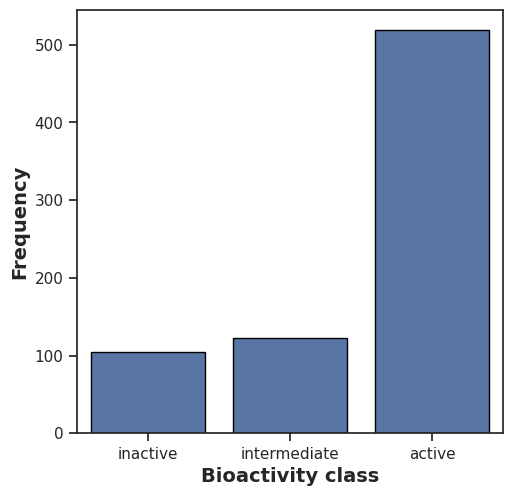

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivty_class', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')


In [25]:
def canonical_smiles(smiles):
    mol = [Chem.MolFromSmiles(i) for i in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mol]
    return smiles

In [26]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

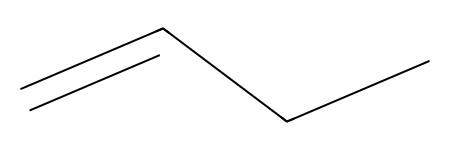

In [27]:
Chem.MolFromSmiles('C=CCC')

In [45]:
## getting molecular descriptors
def RDKit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:#add hydrogen to molecules
        mol = Chem.AddHs(mol)
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

In [31]:
df_cleaned.head(5)

,molecule_chembl_id,canonical_smiles,bioactivty_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL325412,CO[C@@H]1[C@H](O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)...,inactive,298.379,1.2161,2.0,5.0,4.270835
1,CHEMBL116441,CO[C@@H]1C(=O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)O[C...,intermediate,296.363,1.4243,1.0,5.0,5.096910
2,CHEMBL32838,CO[C@@H]1[C@H](OC(=O)/C=C/C=C/C=C/C=C/C(=O)O)C...,active,458.551,3.9154,1.0,6.0,9.000000
3,CHEMBL322528,CCOc1ccc(/C=C/C(=O)Nc2ccc(NC(=O)[C@@H](O)[C@H]...,active,457.596,3.5071,4.0,6.0,7.337242
4,CHEMBL322131,COc1cc(NC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)ccc1NC(...,active,549.624,3.6324,4.0,8.0,6.801343


In [32]:
MoleculeDescriptors,desc_names = RDKit_descriptors(df_cleaned.canonical_smiles)

In [33]:
de_with_200_descriptors = pd.DataFrame(MoleculeDescriptors,columns=desc_names)
de_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.067968,-5.193808,13.067968,2.064180,0.453050,298.379,272.171,298.178024,120,0,...,0,0,0,0,0,0,0,0,0,0
1,13.495102,-5.074479,13.495102,2.039415,0.471610,296.363,272.171,296.162374,118,0,...,0,0,0,0,0,0,0,0,0,0
2,13.748839,-5.346380,13.748839,1.516956,0.174199,458.551,424.279,458.230453,180,0,...,0,0,0,0,0,0,0,0,0,0
3,13.736254,-4.606348,13.736254,0.572341,0.286528,457.596,426.348,457.203527,172,0,...,1,0,0,0,0,0,0,0,0,0
4,14.251387,-4.810205,14.251387,0.754945,0.236974,549.624,514.344,549.247500,212,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,14.097400,-5.906984,14.097400,0.038801,0.540756,429.402,411.258,429.141259,160,0,...,0,0,0,0,0,0,0,0,0,0
505,13.668697,-4.262698,13.668697,0.118196,0.489391,391.475,366.275,391.200825,150,0,...,0,0,0,0,0,0,0,0,0,0
506,13.621331,-3.588598,13.621331,0.021968,0.525795,340.386,324.258,340.132411,126,0,...,0,0,0,0,0,0,0,0,0,0
507,13.792262,-5.741697,13.792262,0.057712,0.532741,378.741,368.661,378.049523,132,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
## getting morgan fingerprints
from rdkit import Chem
from rdkit.Chem import AllChem


def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i)
        fpts = AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)
    return np.array(Morgan_fpts)

In [43]:
Morgan_fpts = morgan_fpts(df_cleaned.canonical_smiles)

In [44]:
Morgan_fingerprints = pd.DataFrame(Morgan_fpts,columns=['col_{}'.format(i) for i in range(Morgan_fpts.shape[1])])
Morgan_fingerprints

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_2038,col_2039,col_2040,col_2041,col_2042,col_2043,col_2044,col_2045,col_2046,col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
